In [53]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import eda_helper_functions

# READ THE TRAINING DATA

In [13]:
file_path="/Users/karthik/Desktop/SAGEMAKER/DATASET/train.csv"

In [14]:
train=pd.read_csv(file_path)

In [15]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Indigo,2019-06-24,Banglore,Delhi,13:00:00,15:50:00,170,0.0,No Info,3943
1,Jet Airways,2019-05-21,Kolkata,Banglore,08:25:00,19:50:00,685,1.0,In-flight meal not included,10844
2,Spicejet,2019-05-27,Mumbai,Hyderabad,22:45:00,00:15:00,90,0.0,No Info,2017
3,Air India,2019-06-06,Kolkata,Banglore,08:20:00,20:25:00,725,2.0,No Info,11432
4,Jet Airways,2019-05-15,Kolkata,Banglore,20:00:00,08:15:00,735,1.0,In-flight meal not included,8586
...,...,...,...,...,...,...,...,...,...,...
635,Indigo,2019-06-24,Kolkata,Banglore,15:15:00,17:45:00,150,0.0,No Info,4804
636,Jet Airways,2019-05-21,Delhi,Cochin,22:50:00,04:25:00,335,1.0,In-flight meal not included,12898
637,Indigo,2019-04-15,Delhi,Cochin,06:50:00,12:10:00,320,1.0,No Info,5761
638,Indigo,2019-05-15,Banglore,Delhi,04:00:00,06:50:00,170,0.0,No Info,3943


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          640 non-null    object 
 1   date_of_journey  640 non-null    object 
 2   source           640 non-null    object 
 3   destination      640 non-null    object 
 4   dep_time         640 non-null    object 
 5   arrival_time     640 non-null    object 
 6   duration         640 non-null    int64  
 7   total_stops      640 non-null    float64
 8   additional_info  640 non-null    object 
 9   price            640 non-null    int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 50.1+ KB


In [34]:
train=train.assign(**{
    col:pd.to_datetime(train.loc[:,col],dayfirst=True,format='mixed')
    for col in ["date_of_journey","dep_time","arrival_time"]
}
                  )

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


# HIGH LEVEL SUMMARY OF DATA

In [37]:
train.describe(include="number")

,duration,total_stops,price
count,640.00000,640.000000,640.000000
mean,594.15625,0.770312,8973.889063
std,492.48594,0.682025,4668.581499
min,75.00000,0.000000,1965.000000
25%,170.00000,0.000000,4990.750000
50%,437.50000,1.000000,8073.000000
75%,845.00000,1.000000,12397.000000
max,2295.00000,4.000000,36235.000000


# analysis of missing info

In [41]:
from sklearn.ensemble import IsolationForest

In [47]:
(
    train
    .assign(is_outlier=IsolationForest(n_estimators=10,random_state=42).fit_predict(train
                                                                                   .drop(columns="price")
                                                                                   .select_dtypes(include="number")))
    .query("is_outlier==-1")
)


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,is_outlier
2,Spicejet,2019-05-27,Mumbai,Hyderabad,2024-06-21 22:45:00,2024-06-21 00:15:00,90,0.0,No Info,2017,-1
3,Air India,2019-06-06,Kolkata,Banglore,2024-06-21 08:20:00,2024-06-21 20:25:00,725,2.0,No Info,11432,-1
6,Jet Airways,2019-03-03,Delhi,Cochin,2024-06-21 05:25:00,2024-06-21 04:25:00,1380,2.0,No Info,18799,-1
15,Vistara,2019-04-21,Delhi,Cochin,2024-06-21 14:40:00,2024-06-21 17:50:00,190,0.0,No Info,6741,-1
16,Air India,2019-05-12,Kolkata,Banglore,2024-06-21 09:25:00,2024-06-21 11:10:00,1545,1.0,No Info,8891,-1
...,...,...,...,...,...,...,...,...,...,...,...
620,Jet Airways,2019-05-09,Delhi,Cochin,2024-06-21 11:00:00,2024-06-21 14:15:00,195,0.0,No Info,9564,-1
629,Jet Airways,2019-06-01,Delhi,Cochin,2024-06-21 11:40:00,2024-06-21 19:00:00,440,2.0,In-flight meal not included,15812,-1
631,Jet Airways,2019-05-06,Kolkata,Banglore,2024-06-21 21:10:00,2024-06-21 16:20:00,1150,1.0,No Info,13584,-1
634,Indigo,2019-05-24,Mumbai,Hyderabad,2024-06-21 02:35:00,2024-06-21 04:05:00,90,0.0,No Info,3342,-1


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


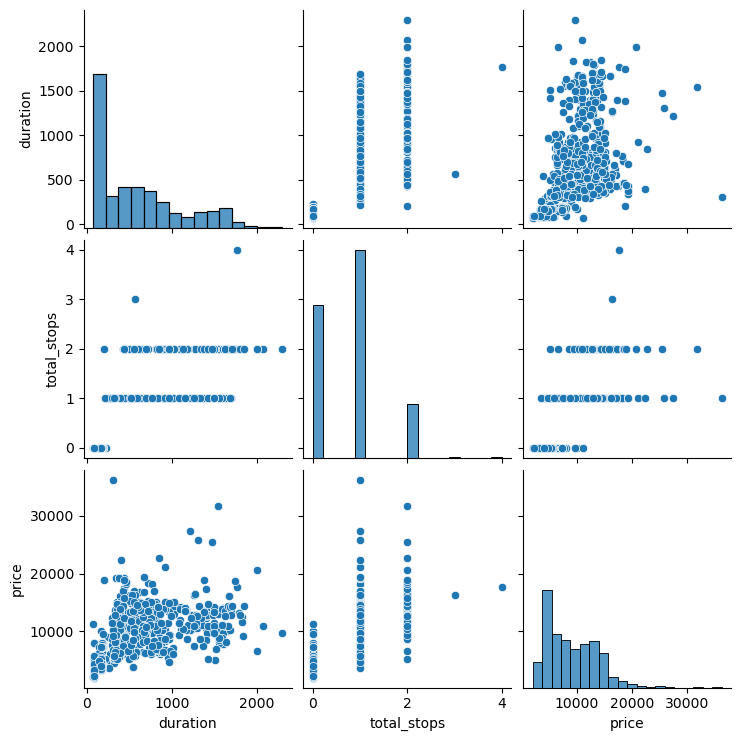

In [48]:
sns.pairplot(data=train)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


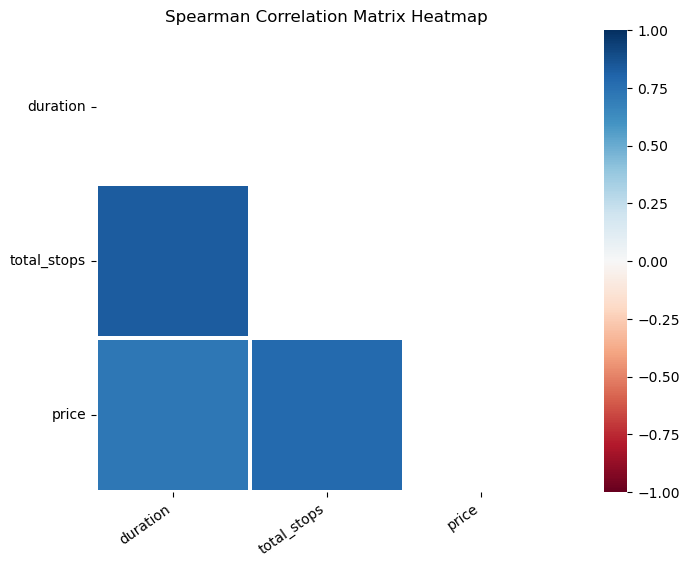

In [61]:
eda_helper_functions.correlation_heatmap(train)

In [62]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

In [63]:
eda_helper_functions.cat_summary(train,"airline")

0           Indigo
1      Jet Airways
2         Spicejet
3        Air India
4      Jet Airways
          ...     
635         Indigo
636    Jet Airways
637         Indigo
638         Indigo
639         Indigo
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,9
top,Jet Airways
freq,222


,count,percentage
category,,
Jet Airways,222,0.346875
Indigo,133,0.207813
Air India,96,0.150000
Multiple Carriers,69,0.107813
Spicejet,64,0.100000
Vistara,31,0.048438
Air Asia,15,0.023438
Goair,9,0.014063
Multiple Carriers Premium Economy,1,0.001563


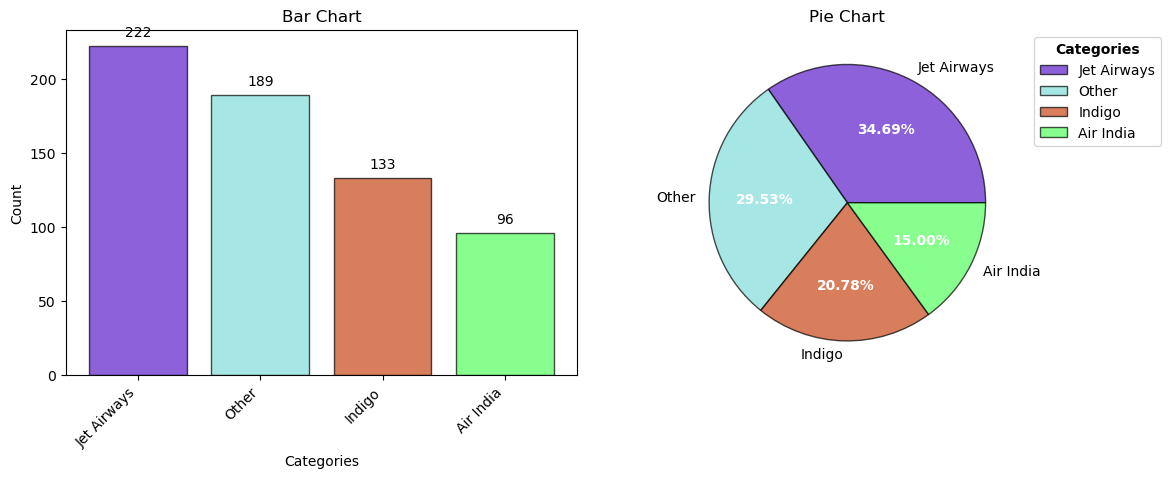

In [68]:
eda_helper_functions.cat_univar_plots(train,"airline",show_wordcloud=False,k=3)

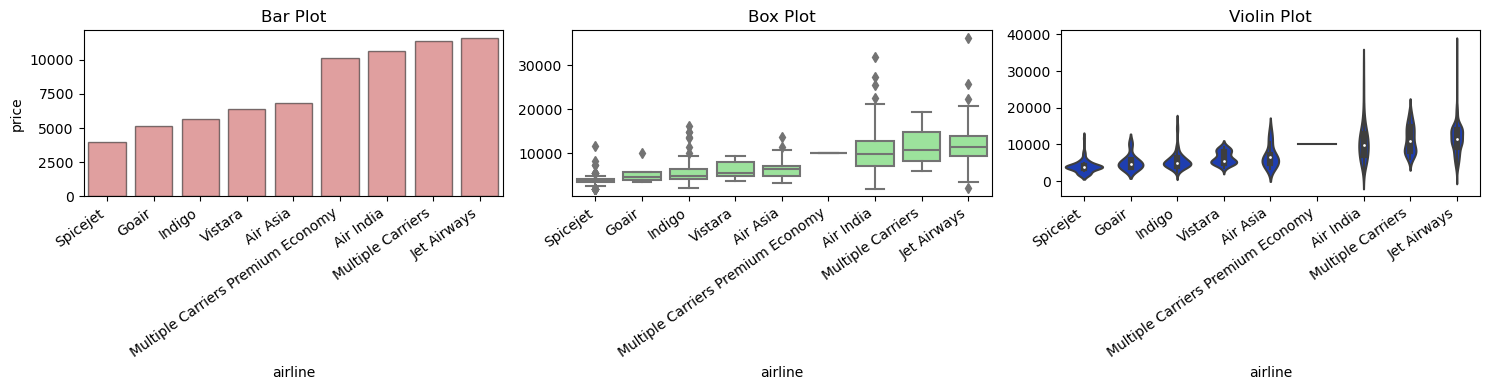

In [75]:
eda_helper_functions.num_cat_bivar_plots(data=train,
                                         cat_var="airline",
                                        num_var="price")

In [76]:
eda_helper_functions.num_cat_hyp_testing(train,"price","airline")
                                         

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 53.44734160747361
- p-value              : 4.5829767641849173e-66
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 322.52692130947435
- p-value              : 6.557367763711322e-65
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other
